### **Importing Libraries**

In [306]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### **Data Collection**

In [307]:
df1 = pd.read_csv('/content/winequality-red.csv',sep =';')
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [308]:
df2 = pd.read_csv('/content/winequality-white.csv',sep =';')
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### **Feature Engineering**

In [309]:
total = [df1,df2]
df = pd.concat(total)
df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4668,6.0,0.170,0.33,6.00,0.036,30.0,111.0,0.99362,3.32,0.58,10.15,7
3727,5.7,0.265,0.28,6.90,0.036,46.0,150.0,0.99299,3.36,0.44,10.80,7
29,7.8,0.645,0.00,2.00,0.082,8.0,16.0,0.99640,3.38,0.59,9.80,6
352,5.5,0.335,0.30,2.50,0.071,27.0,128.0,0.99240,3.14,0.51,9.60,6
2188,6.4,0.180,0.32,9.60,0.052,24.0,90.0,0.99630,3.35,0.49,9.40,6
3928,6.6,0.320,0.47,15.60,0.063,27.0,173.0,0.99872,3.18,0.56,9.00,5
1414,5.8,0.170,0.30,1.40,0.037,55.0,130.0,0.99090,3.29,0.38,11.30,6
502,6.4,0.300,0.30,2.25,0.038,8.0,210.0,0.99370,3.20,0.62,9.90,6
991,8.2,0.260,0.44,1.30,0.046,7.0,69.0,0.99440,3.14,0.62,10.20,4
792,7.1,0.610,0.02,2.50,0.081,17.0,87.0,0.99745,3.48,0.60,9.70,6


In [310]:
df.shape

(6497, 12)

In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


In [312]:
df.isnull().sum()/len(df)*100

,0
fixed acidity,0.0
volatile acidity,0.0
citric acid,0.0
residual sugar,0.0
chlorides,0.0
free sulfur dioxide,0.0
total sulfur dioxide,0.0
density,0.0
pH,0.0
sulphates,0.0


In [313]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [346]:
df.duplicated().sum()/len(df)*100

18.14683700169309

In [349]:
# As Duplicated_values> 18%, we are not going to drop it because it will make loss of almost 20% of the total data which affects the accurcy of our regression or classifier model

### **Exploratory Data Analysis**

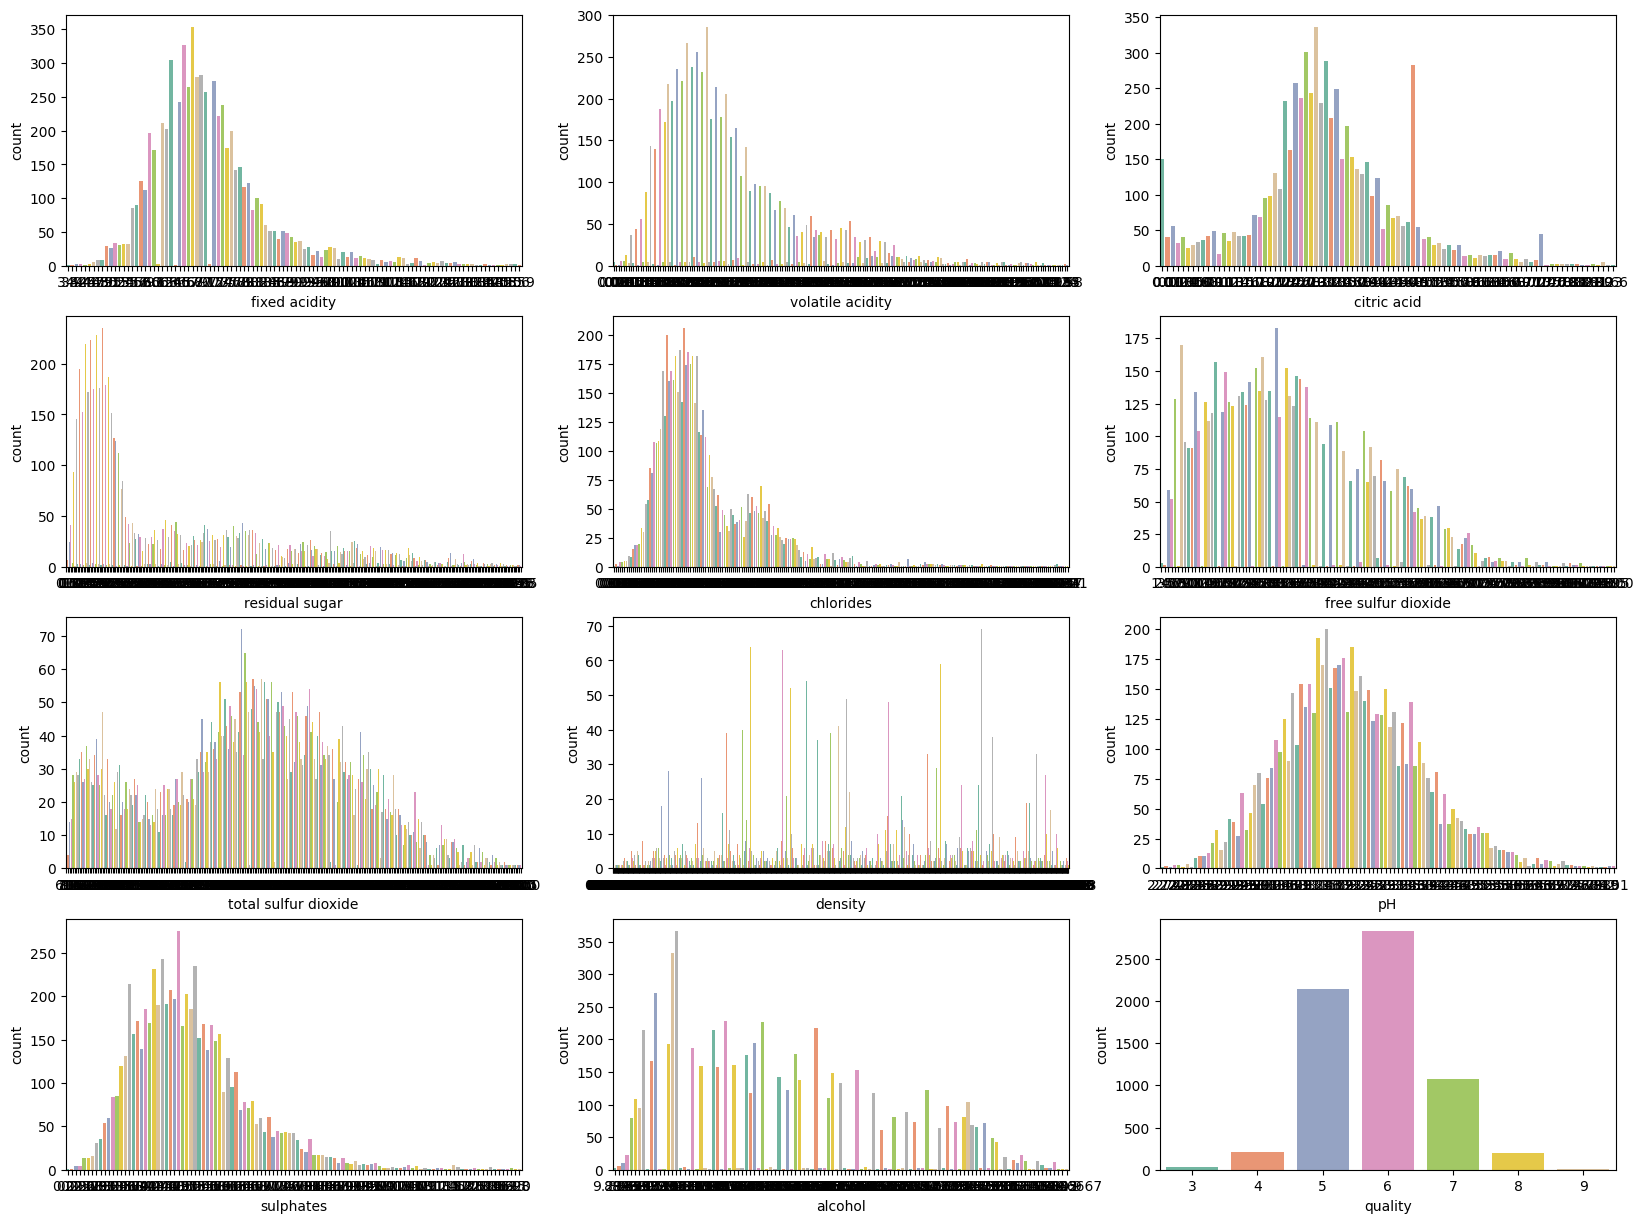

In [314]:
plt.figure(figsize=(20,15))
for i,col in enumerate(df):
  plt.subplot(4,3,i+1)
  sns.countplot(x=col,data=df,palette='Set2')

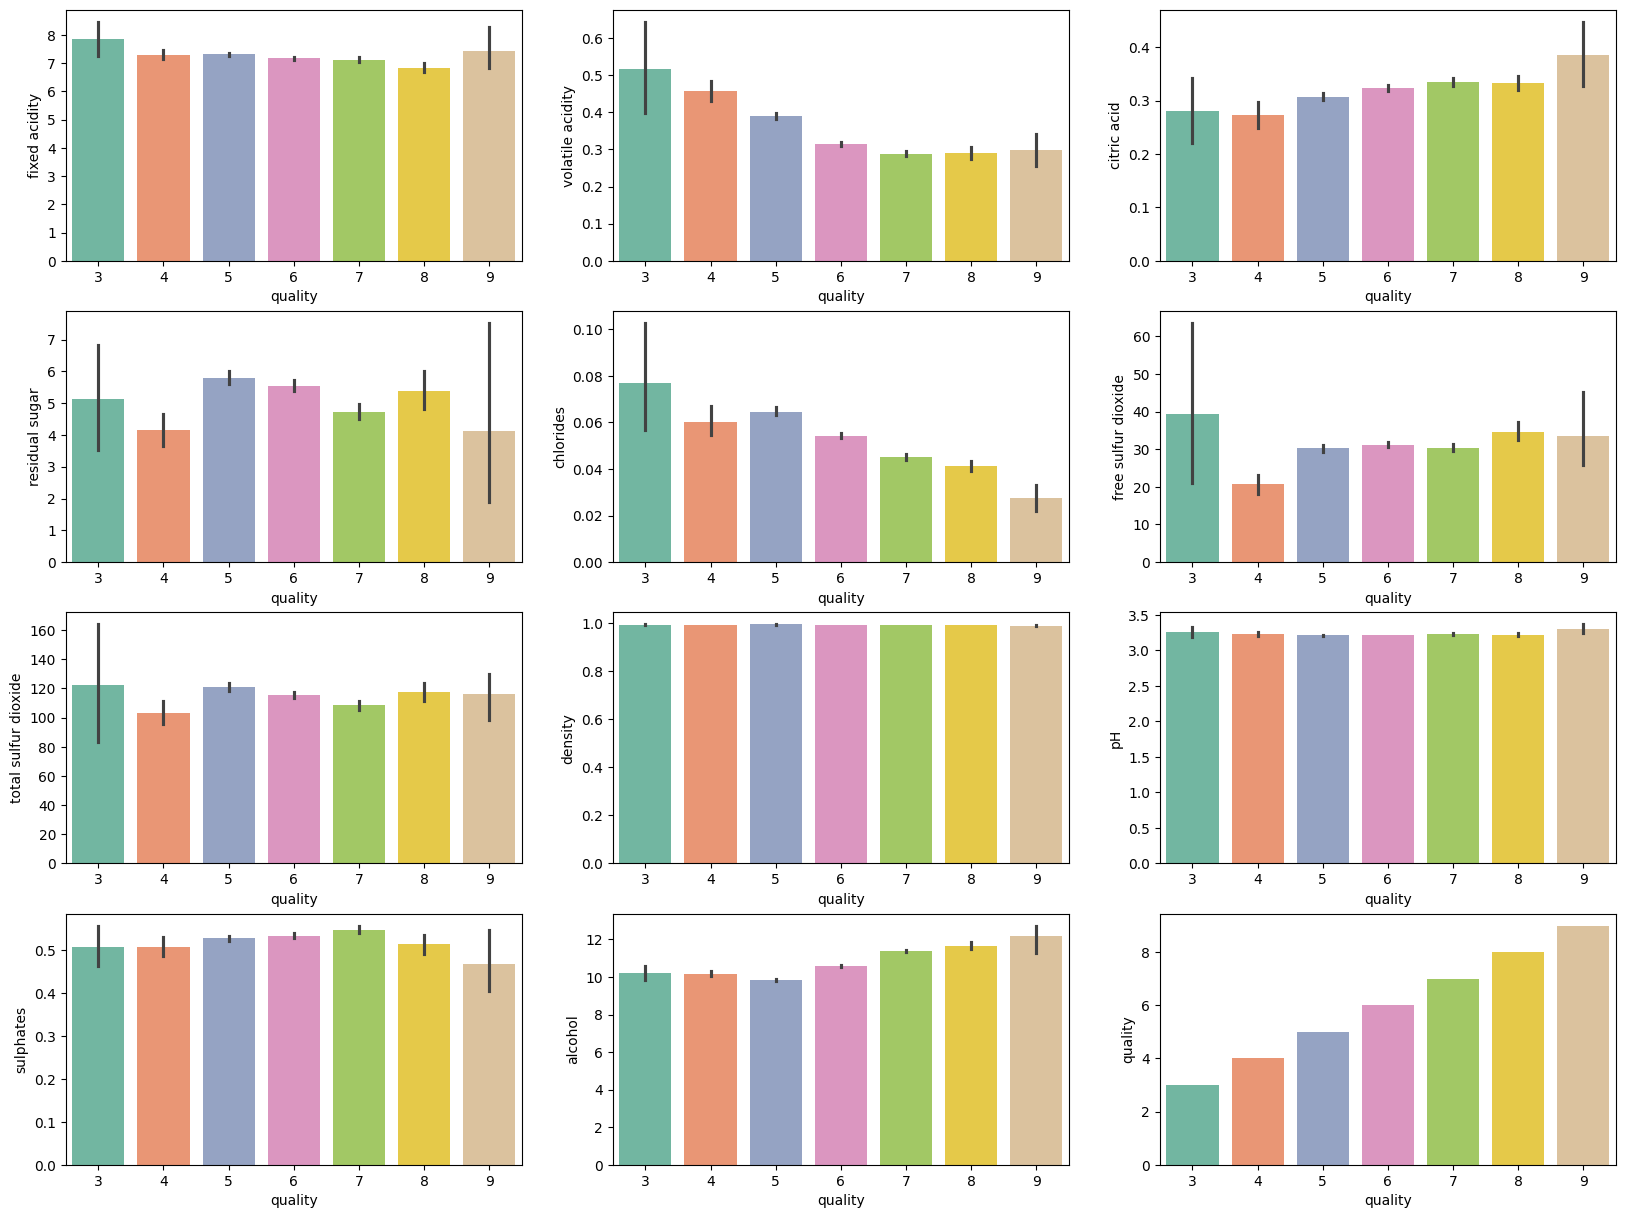

In [315]:
plt.figure(figsize=(20,15))
for i,col in enumerate(df):
  plt.subplot(4,3,i+1)
  sns.barplot(x='quality',y = col,data=df,palette='Set2')

<Axes: >

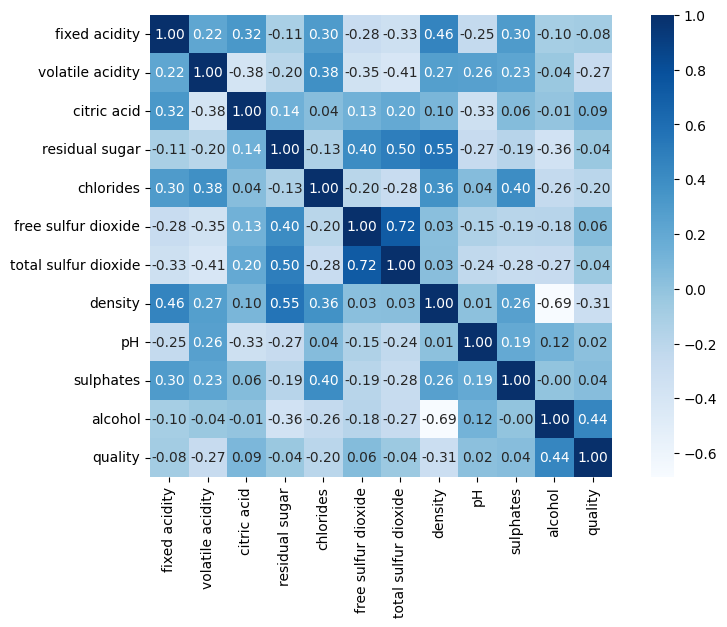

In [316]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cbar = True, square = True,fmt='.2f',annot=True, cmap='Blues')

### **Feature Selection**

In [317]:
# Defining Features
x = df.drop('quality',axis=1)
y = df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

### **Train-Test Split**

In [318]:
# Train-test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

### **Feature Scalling**

In [319]:
# Feature Scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### **Logistic Regression Model**

In [320]:
# Model Creation (Logistic Regression)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [321]:
# Model Testing (LR)
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [322]:
# Checking the acuuracy score (LR)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
acc = accuracy_score(y_test,y_pred)*100
cm = confusion_matrix(y_test,y_pred)
cls_rpt = classification_report(y_test,y_pred)

print(acc)
print(cm)
print(cls_rpt)

83.0
[[1004   41]
 [ 180   75]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1045
           1       0.65      0.29      0.40       255

    accuracy                           0.83      1300
   macro avg       0.75      0.63      0.65      1300
weighted avg       0.81      0.83      0.80      1300



### **DicisionTreeClassifier Model**

In [323]:
# Model Creation (DicisionTreeClassifier)
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [324]:
# Model Testing (DTC)
y_pred_dt = model_dt.predict(x_test)
y_pred_dt

array([0, 0, 0, ..., 0, 0, 1])

In [335]:
# Checking the acuuracy score (DTC)
acc_dt = accuracy_score(y_test,y_pred_dt)*100
cm_dt = confusion_matrix(y_test,y_pred_dt)
cls_rpt_dt = classification_report(y_test,y_pred_dt)

print(acc_dt)
print(cm_dt)
print(cls_rpt_dt)

85.38461538461539
[[948  97]
 [ 93 162]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1045
           1       0.63      0.64      0.63       255

    accuracy                           0.85      1300
   macro avg       0.77      0.77      0.77      1300
weighted avg       0.85      0.85      0.85      1300



### **RandomForestClassifier Model**

In [336]:
# Model Creation (RandomForestClassifier)
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(x_train,y_train)

RandomForestClassifier()

In [337]:
# Model Testing (RFC)
y_pred_rf = model_rf.predict(x_test)
y_pred_rf

array([0, 0, 0, ..., 0, 0, 1])

In [338]:
# Checking the acuuracy score (RFC)
acc_rf = accuracy_score(y_test,y_pred_rf)*100
cm_rf = confusion_matrix(y_test,y_pred_rf)
cls_rpt_rf = classification_report(y_test,y_pred_rf)

print(acc_rf)
print(cm_rf)
print(cls_rpt_rf)

90.76923076923077
[[1019   26]
 [  94  161]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.94      1045
           1       0.86      0.63      0.73       255

    accuracy                           0.91      1300
   macro avg       0.89      0.80      0.84      1300
weighted avg       0.90      0.91      0.90      1300



### **SVC Model**

In [339]:
# Model Creation (SVC)
from sklearn.svm import SVC
model_svc = SVC()
model_svc.fit(x_train,y_train)

SVC()

In [340]:
# Model Testing (SVC)
y_pred_svc = model_svc.predict(x_test)
y_pred_svc

array([0, 0, 0, ..., 0, 0, 0])

In [341]:
# Checking the acuuracy score (SVC)
acc_svc = accuracy_score(y_test,y_pred_svc)*100
cm_svc = confusion_matrix(y_test,y_pred_svc)
cls_rpt_svc = classification_report(y_test,y_pred_svc)

print(acc_svc)
print(cm_svc)
print(cls_rpt_svc)

83.92307692307692
[[1011   34]
 [ 175   80]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1045
           1       0.70      0.31      0.43       255

    accuracy                           0.84      1300
   macro avg       0.78      0.64      0.67      1300
weighted avg       0.82      0.84      0.81      1300



### **KNeighborsClassifier Model**

In [342]:
# Model Creation (KNN)
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [343]:
# Model Testing (KNN)
y_pred_knn = model_knn.predict(x_test)
y_pred_knn

array([0, 0, 0, ..., 0, 0, 1])

In [344]:
# Checking the acuuracy score (KNN)
acc_knn = accuracy_score(y_test,y_pred_knn)*100
cm_knn = confusion_matrix(y_test,y_pred_knn)
cls_rpt_knn = classification_report(y_test,y_pred_knn)

print(acc_knn)
print(cm_knn)
print(cls_rpt_knn)

85.23076923076923
[[969  76]
 [116 139]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1045
           1       0.65      0.55      0.59       255

    accuracy                           0.85      1300
   macro avg       0.77      0.74      0.75      1300
weighted avg       0.84      0.85      0.85      1300



In [345]:
# As of the accuracy score of the RandomForestClassifier is much better than the other rigression or classifier models,
# We are going tp use this one for prediction the Wine quality

### **Model Deployment**

In [352]:
# Data Input
input_data = (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)

#change the input data as numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#scaling the input data
input_data_reshaped = sc.transform(input_data_reshaped)

#predicting the given input
prediction = model_rf.predict(input_data_reshaped)

if (prediction[0] == 0):
  print('The Wine quality is not upto the mark!')
  print('The rating of this wine is below 7')
else:
  print('Cheers...It is a Good quality Wine.')
  print('The rating of this wine is Above 7')

Cheers...It is a Good quality Wine.
The rating of this wine is Above 7
